# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
clase = 1
root_dir = "/content/drive/My Drive/"
project_dir = "RRNN_PxQ/Clase_" + str(clase) + "/Práctica/"
os.chdir(root_dir + project_dir)

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from keras import backend as K

# Entrena un modelo de Redes Neuronales con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?


##### Funciones

In [4]:
# imprime los puntos para un dataset bidimensional junto con la frontera de decisión del modelo
def plot_2D(modelo, x, y,title="",detail=0.1):

    assert x.shape[1]==2,f"x debe tener solo dos variables de entrada (tiene {x.shape[1]})"
    # nueva figura
    plt.figure()
    # gráfico con la predicción aprendida
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, detail),
                         np.arange(y_min, y_max, detail))

    Z = np.c_[xx.ravel(), yy.ravel()]

    Z = modelo.predict(Z)
    Z = Z.argmax(axis=1)  # para Keras
    titulo = f"{title}: regiones de cada clase"
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)  # ,  cmap='RdBu')
    plt.colorbar()
    plt.title(titulo)


    # puntos con las clases
    plt.scatter(x[:, 0], x[:, 1], c=y)

### Modelo

In [27]:
# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
#dataset = "2_clases_simple.csv"
#dataset = "6_clases_dificil.csv"
#dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"
dataset = "circulos.csv"

# Dataset con más de 2 dimensiones
#dataset = "iris.csv"
#dataset = "diabetes.csv"
#dataset = "ecoli.csv"

# Carga del dataset
dataset_path=os.path.join("datasets_clasificacion",dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:-1],data[:,-1]
# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape
# calcula la cantidad de clases
classes=int(y.max()+1)

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

Información del conjunto de datos:
Ejemplos: 300
Variables de entrada: 2
Cantidad de clases: 2


Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)


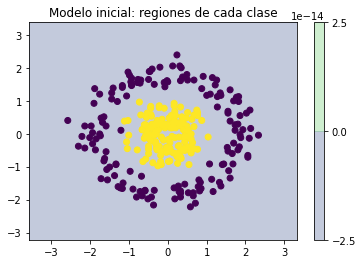

In [28]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

# Creo un modelo Red Neuronal 
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(5,input_shape=(d_in,), activation='relu'),
    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    plot_2D(modelo,x,y,title=f"Modelo inicial",detail=0.05)


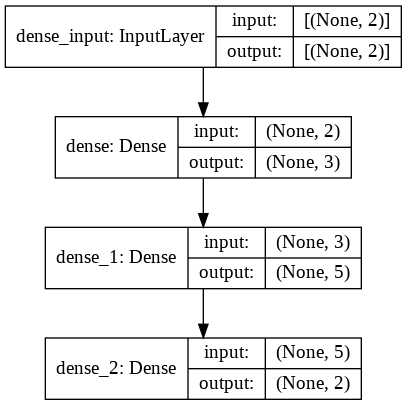

In [8]:
#Podemos visualizar el modelo con el método plot_model
tf.keras.utils.plot_model(modelo, show_shapes= True)

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [29]:
modelo.compile(
  optimizer=keras.optimizers.SGD(lr=0.0001), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'] 
)

#Podemos utilizar otros optimizadores, incluso el mismo SGD con momentum:
#SGD con momentum: keras.optimizers.SGD(learning_rate=0.01, momentum=0.1, nesterov=False)  https://keras.io/api/optimizers/sgd/
#Adam: keras.optimizers.Adam()

#Los optimizadores también pueden pasarse con nombre directamente, y se van a usar los parámetros por default:
# optimizer = 'adam'


# Entrenamiento del modelo
modelo.fit(x,y,epochs=400,batch_size=16, validation_split= 0.2)


Epoch 1/400
15/15 [==============================] - 0s 13ms/step - loss: 0.6782 - accuracy: 0.4905 - val_loss: 0.6705 - val_accuracy: 0.5833
Epoch 2/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.4599 - val_loss: 0.6705 - val_accuracy: 0.5833
Epoch 3/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.4871 - val_loss: 0.6705 - val_accuracy: 0.5833
Epoch 4/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.4972 - val_loss: 0.6704 - val_accuracy: 0.5833
Epoch 5/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.4937 - val_loss: 0.6704 - val_accuracy: 0.5833
Epoch 6/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.4747 - val_loss: 0.6704 - val_accuracy: 0.5833
Epoch 7/400
15/15 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.4918 - val_loss: 0.6704 - val_accuracy: 0.5833
Epoch 8/400


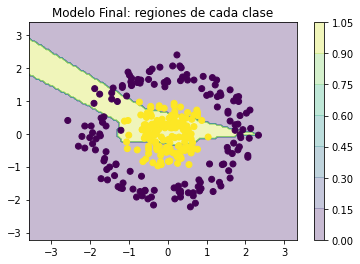

In [30]:
# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
  plot_2D(modelo,x,y,title=f"Modelo Final",detail=0.05)
else: 
  yhat = modelo.predict(x).argmax(axis=1).tolist()
  y_true = y.astype(np.int).tolist()
  print(confusion_matrix(y_true, yhat))

## Vamos a crear otro modelo "de juguete" para ver cómo se modifican los outputs capa a capa:

In [35]:
modelo = keras.Sequential()
modelo.add(keras.layers.Dense(3,input_shape=(d_in,), activation='relu'))
modelo.add(keras.layers.Dense(3, activation='relu'))
modelo.add(keras.layers.Dense(2, activation='relu'))
modelo.add(keras.layers.Dense(2, activation='relu'))
modelo.add(keras.layers.Dense(2, activation='relu'))
modelo.add(keras.layers.Dense(classes, activation='softmax'))

modelo.compile(
  optimizer=keras.optimizers.SGD(lr=0.0001), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

modelo.fit(x,y,epochs=300,batch_size=32, verbose=0)

In [25]:
def get_points(layer_output):
  X = []
  Y = []
  for k in range(len(layer_output)):
    X.append(layer_output[k][0])
    Y.append(layer_output[k][1])
  return X, Y

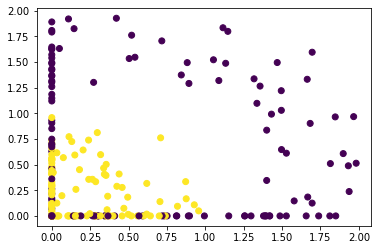

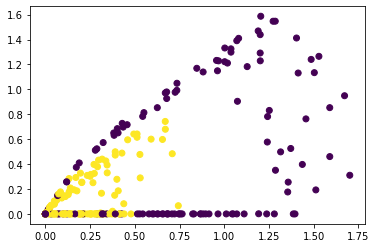

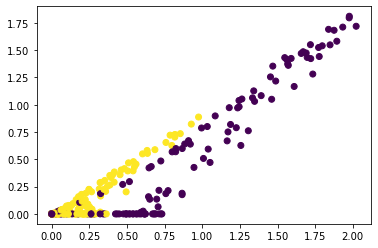

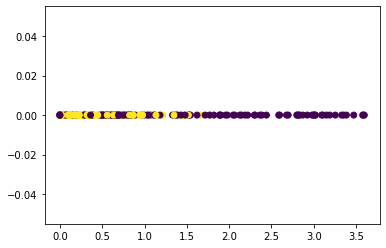

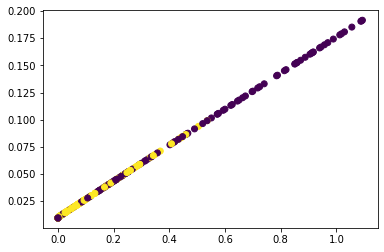

In [36]:
for capa in range(len(modelo.layers)-1):
  layer_output = K.function([modelo.layers[0].input],[modelo.layers[capa].output])([x])[0]
  X, Y = get_points(layer_output)
  plt.scatter(X, Y, c= y)
  plt.show()